In [123]:
import sys
sys.path.append("..")

from utils.utils import Vec, Matrix

# Input

In [124]:
with open("input.txt") as file:
    input = file.read()

In [125]:
class Robot:
    def __init__(self, p, v):
        self.p = p
        self.v = v
    def __repr__(self):
        return f"R(p={self.p}, v={self.v})"

In [126]:
def parse_input(input):
    return [
        Robot(Vec(int(px),int(py)), Vec(int(vx),int(vy)))
        for robot  in input.split("\n")
        for p, v   in [robot.split(" ")]
        for px, py in [p.split("=")[1].split(",")]
        for vx, vy in [v.split("=")[1].split(",")]
    ]

# Part 1

In [127]:
def get_pos_after_sec(rob, sec, shape):
    return Robot((rob.p + rob.v * sec) % shape, rob.v)

In [128]:
robots = parse_input(input)
shape = Vec(101, 103)
robots = [get_pos_after_sec(robot, 100, shape) for robot in robots]

In [129]:
# map robot to (q1, q2, q3, q4)
import numpy as np
q = Matrix(np.zeros((shape.x//2, shape.y//2)))
def get_quadrant(robot):
    if robot.p in q:
        return [1, 0, 0, 0]
    if robot.p - Vec(shape.x//2+1, 0) in q:
        return [0, 1, 0, 0]
    if robot.p - Vec(0, shape.y//2+1) in q:
        return [0, 0, 1, 0]
    elif robot.p - Vec(shape.x//2+1, shape.y//2+1) in q:
        return [0, 0, 0, 1]
    else:
        return [0, 0, 0, 0]

In [130]:
np.prod(np.sum(([get_quadrant(r) for r in robots]), axis=0))

228690000

# Part 2

In [131]:
from PIL import Image

In [132]:
def display_board(robots, shape):
    m = Matrix(np.full((shape.x, shape.y), 0))
    for robot in robots:
        m[robot.p] = 255
    # string = "\n".join(["".join(line) for line in m.tolist()])
    return Image.fromarray(m.T.astype(np.uint8))

In [133]:
def is_tree(robots):
    # assume tree has mass in center
    count = 0
    for r in robots:
        if Vec(30,30) <= r.p and r.p <= Vec(70,70):
            count += 1
    return count>len(robots)//2

Index 7093


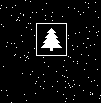

In [134]:
robots = parse_input(input)
i = 7000
robots = [get_pos_after_sec(robot, i, shape) for robot in robots]
while i < 8000:
    robots = [get_pos_after_sec(robot, 1, shape) for robot in robots]
    i += 1
    if is_tree(robots):
        print("Index", i)
        break
display_board(robots, shape)